In [1]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the dataset
data = pd.read_csv('insurances.csv')

In [3]:
# load the first five records from the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# display the last five records from the dataset
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# shape of the dataset
data.shape

(1338, 7)

In [6]:
# To check if there are any null values in the dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## So from the above observation, it is shown that there are no null values in the dataset

In [8]:
# Convert all the categorical values into numerical values

data['sex'] = data['sex'].astype('category')
data['sex'] = data['sex'].cat.codes

In [10]:
data['smoker'] = data['smoker'].astype('category')
data['smoker'] = data['smoker'].cat.codes

In [11]:
data['region'] = data['region'].astype('category')
data['region'] = data['region'].cat.codes

In [12]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [15]:
# Divide the dataset into independent and dependent features
X = data.drop(columns = 'charges')
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [16]:
Y = data['charges']
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [18]:
# Divide the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [20]:
# Train the data using linear Regression model
from sklearn.linear_model import LinearRegression

lin = LinearRegression()

In [21]:
# train the input training data
lin.fit(X_train, Y_train)

LinearRegression()

In [22]:
# find the slope
m = lin.coef_
print(m)

[  256.5772619    -49.39232379   329.02381564   479.08499828
 23400.28378787  -276.31576201]


In [23]:
# find the y-intercept
c = lin.intercept_
print(c)

-11827.733141795683


In [24]:
# find the predicted output for the training data charges
y_pred_train = lin.predict(X_train)
print(y_pred_train)

[ 2074.0645306   8141.81393908 18738.94132528  7874.86959064
  6305.12726989  2023.19725425 26861.18663021 14932.93021746
 10489.56733846 16254.02800921 11726.39324257 11284.0092172
 39312.16870908  5825.91078917 12314.92042527  3164.68427134
 15406.30681252  4648.58167988  5011.79585436  6012.4796038
 15349.49652486  8970.97358853  8780.43012222 34229.60622887
  6700.80932636 26943.25864121 27280.48004482 15477.83837581
  8825.62578924 34394.38378457 10177.85528603  3901.18161227
 15608.58732963 29584.76846515 29453.37088923 28132.67012427
 10003.22154888 33049.08935397  3963.45204974 25461.54857001
  5656.76892592 27993.86773531  7049.4472544  15100.38851758
  2552.92266861 35458.5756605  15250.90732084  3190.28483443
  1768.85441295 10155.17603664  9937.89476088 11225.91583863
 16776.25691816  4332.14442527  1904.56473771  4169.01766783
  5586.26152347  6181.88067913 26788.8656339  14126.13855797
 11861.37395532  7811.00983646 14043.16898219  2761.62716836
 13245.886833   11768.0889

In [25]:
# find the predicted output for the testing data charges
y_pred_test = lin.predict(X_test)
print(y_pred_test)

[11051.54909755  9821.28110689 37867.57220923 16125.70579228
  6920.27132517  3879.38549816  1448.91928088 14390.17797974
  9022.95151353  7458.83371884  4584.60125463 10309.9886336
  8693.03891958  4085.25393494 27551.60737718 11151.0640722
 11243.0536825   5962.9521121   8181.9015666  26750.7993431
 33448.59842228 14350.03320383 11672.89478465 32235.7832204
  4326.07702625  9096.53607025  1045.25196369 10177.76672094
  4042.60346751 10384.28681219  9035.98983755 40123.71002379
 15507.20819083 13678.264976   24481.97362849  5059.21988589
 12889.80609711 30333.92625689 33301.25091403  3431.35787088
  3941.81614597  4203.90901434 30219.19050725 39245.56885373
 27762.83744249  4994.74188765 11042.48621304  7760.15047885
  3569.09734756 10613.61535955  5544.95921408  3397.80923785
 32701.67144343 38285.57836702 16290.50463759  6965.99677468
  5895.27536963  9364.94083823  9395.1780384  11722.13868077
  1611.87873326 38750.4981005  15296.11225478 11708.42958487
 14076.39653066 13904.285644

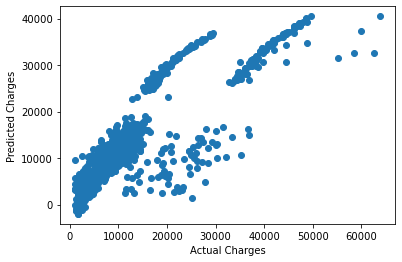

In [29]:
# To perform the Visulaization on the training data

plt.scatter(Y_train, y_pred_train)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

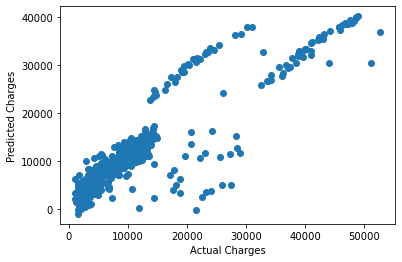

In [30]:
# To perform the Visulaization on the testing data

plt.scatter(Y_test, y_pred_test)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [34]:
# To predict how close the testing data has well fitted into the line
from sklearn.metrics import r2_score

accuracy = (r2_score(Y_test, y_pred_test))*100.0

print("Accuracy for the training data is:", accuracy)

Accuracy for the training data is: 79.11113876316934
